# Decision Support System 

## Data preperation:

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
sns.set_style("darkgrid"); # To show the graphs with white background and gridded
import plotly.express as px;
plt.style.use("seaborn-notebook");

In [46]:
data = pd.read_csv("world-happiness-report-2021.csv")

In [47]:
data

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [48]:
# Info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

## Data Content
#### The happiness scores and rankings use data from Gallup World Poll.
    Gallup World Poll: In 2005, Gallup began its World Poll, which continually surveys citizens in 160 countries, representing more than 98% of the world's adult population. The Gallup World Poll consists of more than 100 global questions as well as region-specific items.
#### The columns following:
    the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

#### Ladder score:
    Happiness score or subjective well-being. This is the national average response to the question of life evaluations.

#### Logged GDP per capita:
    The GDP-per-capita time series from 2019 to 2020 using countryspecific forecasts of real GDP growth in 2020.
#### Social support: 
    Social support refers to assistance or support provided by members of social networks to an individual.
#### Healthy life expectancy:
    Healthy life expectancy is the average life in good health - that is to say without irreversible limitation of activity in daily life or incapacities - of a fictitious generation subject to the conditions of mortality and morbidity prevailing that year.
#### Freedom to make life choices: 
    Freedom to make life choices is the national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?” ... It is defined as the average of laughter and enjoyment for other waves where the happiness question was not asked
#### Generosity:
    Generosity is the residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita. This column has negative values that won't be accepted in the algorithms of this DSS.
#### Perceptions of corruption:
    The measure is the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?”
#### Ladder score in Dystopia:
    It has values equal to the world’s lowest national averages. Dystopia as a benchmark against which to compare contributions from each of the six factors. Dystopia is an imaginary country that has the world's least-happy people. ... Since life would be very unpleasant in a country with the world's lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom, and least social support, it is referred to as “Dystopia,” in contrast to Utopia
World Happiness Report Official Website: https://worldhappiness.report/

### The columns that will are kept: 
    Logged GDP per capita	Social support	Healthy life expectancy	Freedom to make life choices	Perceptions of corruption

In [49]:
#make the countries as indexes, drop the regional indicator column since it's not numerical and drop ladder score since its the score of happiness that we are searching 
df = data.copy()
df.set_index('Country name', inplace=True)
df=df.drop(["Regional indicator","Ladder score","Standard error of ladder score","upperwhisker","lowerwhisker","Ladder score in Dystopia","Explained by: Log GDP per capita","Explained by: Social support","Explained by: Healthy life expectancy","Explained by: Freedom to make life choices","Explained by: Generosity","Explained by: Perceptions of corruption","Dystopia + residual","Generosity"], axis =1)
df

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Country name,,,,,
Finland,10.775,0.954,72.000,0.949,0.186
Denmark,10.933,0.954,72.700,0.946,0.179
Switzerland,11.117,0.942,74.400,0.919,0.292
Iceland,10.878,0.983,73.000,0.955,0.673
Netherlands,10.932,0.942,72.400,0.913,0.338
...,...,...,...,...,...
Lesotho,7.926,0.787,48.700,0.715,0.915
Botswana,9.782,0.784,59.269,0.824,0.801
Rwanda,7.676,0.552,61.400,0.897,0.167


## Data Distribution 

(array([0, 1, 2]),
 [Text(0, 0, 'Social support'),
  Text(1, 0, 'Freedom to make life choices'),
  Text(2, 0, 'Perceptions of corruption')])

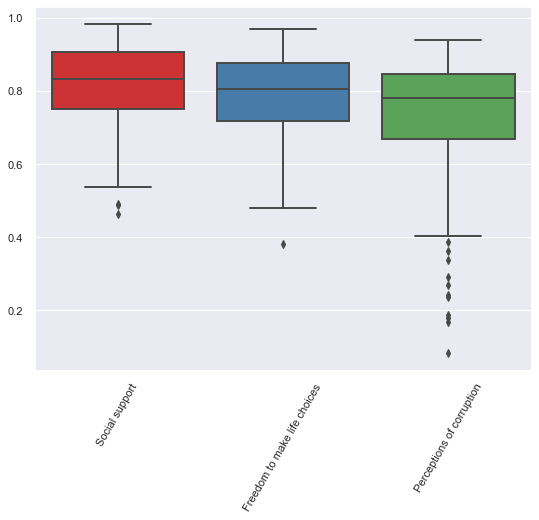

In [50]:
# Distribution of feature set 1: Social support, Freedom to make life choices, Perceptions of corruption
figure(figsize=(8, 6), dpi=80)
listFeatures = ["Social support", "Freedom to make life choices", "Perceptions of corruption"]
sns.boxplot(data = data.loc[:, listFeatures], orient = "v", palette = "Set1")
plt.xticks(rotation = 60)

(array([0]), [Text(0, 0, 'Logged GDP per capita')])

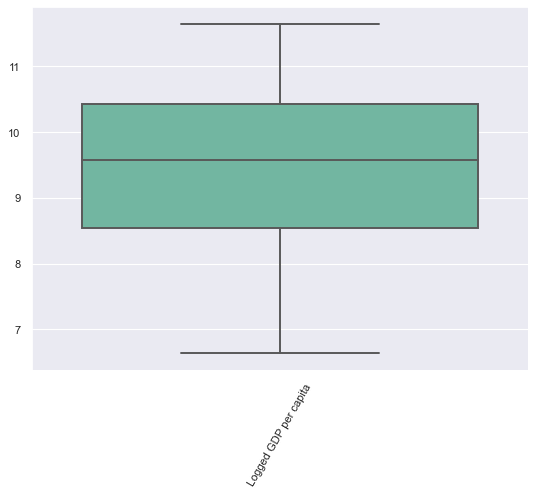

In [51]:
# Distribution of feature set 2: Logged GDP per capita
figure(figsize=(8, 6), dpi=80)
listFeatures = ["Logged GDP per capita"]
sns.boxplot(data = data.loc[:, listFeatures], orient = "v", palette = "Set2")
plt.xticks(rotation = 60)

(array([0]), [Text(0, 0, 'Healthy life expectancy')])

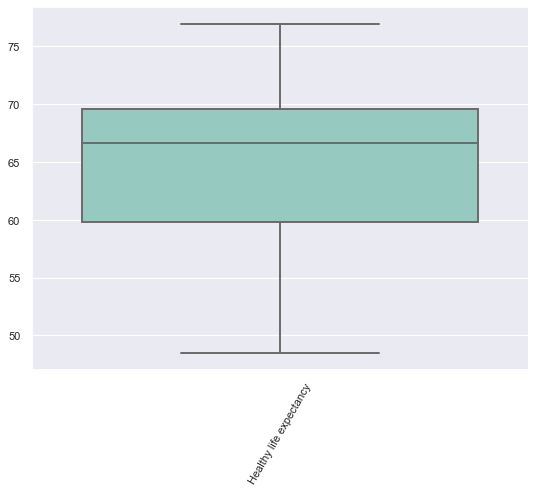

In [52]:
# Distribution of feature set 3: Healthy life expectancy
figure(figsize=(8, 6), dpi=80)
listFeatures = ["Healthy life expectancy"]
sns.boxplot(data = data.loc[:, listFeatures], orient = "v", palette = "Set3")
plt.xticks(rotation = 60)

## Entropy

### Step 0

In [53]:
Sum = df.sum(axis = 0)
Sum = Sum.rename("Sum") 
df0 = df.append(Sum,ignore_index=False)
df0

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Country name,,,,,
Finland,10.775,0.954,72.000,0.949,0.186
Denmark,10.933,0.954,72.700,0.946,0.179
Switzerland,11.117,0.942,74.400,0.919,0.292
Iceland,10.878,0.983,73.000,0.955,0.673
Netherlands,10.932,0.942,72.400,0.913,0.338
...,...,...,...,...,...
Botswana,9.782,0.784,59.269,0.824,0.801
Rwanda,7.676,0.552,61.400,0.897,0.167
Zimbabwe,7.943,0.750,56.201,0.677,0.821


In [54]:
#n the number of criteria
n = df.shape[1]
n

5

In [55]:
# m the number of alternatives 
m = df.shape[0]
m

149

In [56]:
# k which is 1/ln(m)
k = 1/ np.log(m)
k

0.1998422722505727

### Step 1: Normalize the decision matrix 

In [57]:
# p_ij = x_ij/sum{j}(x_ij)
df1 = df.copy()
df1 = df1 / Sum
df1

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Country name,,,,,
Finland,0.007667,0.007859,0.007435,0.008046,0.001716
Denmark,0.007779,0.007859,0.007507,0.008020,0.001651
Switzerland,0.007910,0.007760,0.007683,0.007792,0.002694
Iceland,0.007740,0.008097,0.007538,0.008097,0.006209
Netherlands,0.007779,0.007760,0.007476,0.007741,0.003118
...,...,...,...,...,...
Lesotho,0.005640,0.006483,0.005029,0.006062,0.008442
Botswana,0.006960,0.006458,0.006120,0.006986,0.007390
Rwanda,0.005462,0.004547,0.006340,0.007605,0.001541


In [58]:
# p_ij*ln(p_ij)
df2 = df1.copy()
df2 = df2 * np.log(df2)
# I am dropping the generosity column since it has a lot of nan values after doing the log 

# for the other columns tat have nan values, I am replacing with 0 since the number is small so it won't have a big affect on the result (the opposite of geneority column)
df2 = df2.fillna(0) 
df2

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Country name,,,,,
Finland,-0.037344,-0.038084,-0.036443,-0.038802,-0.010927
Denmark,-0.037778,-0.038084,-0.036725,-0.038705,-0.010579
Switzerland,-0.038282,-0.037703,-0.037406,-0.037826,-0.015940
Iceland,-0.037627,-0.038999,-0.036845,-0.038996,-0.031553
Netherlands,-0.037776,-0.037703,-0.036604,-0.037630,-0.017994
...,...,...,...,...,...
Lesotho,-0.029202,-0.032665,-0.026616,-0.030951,-0.040306
Botswana,-0.034576,-0.032565,-0.031190,-0.034678,-0.036267
Rwanda,-0.028456,-0.024524,-0.032088,-0.037105,-0.009977


In [59]:
Sum2 = df2.sum(axis = 0)
Sum2 = Sum2.rename("Sum2") 
Sum2

Logged GDP per capita          -4.996302
Social support                 -4.993507
Healthy life expectancy        -4.998449
Freedom to make life choices   -4.993258
Perceptions of corruption      -4.966964
Name: Sum2, dtype: float64

## Step 2: Compute entropy where m is the number of alternatives

In [60]:
# e_j = -k*p_ij*ln(p_ij)
df3 = -k * Sum2
df3 =df3.rename("Entropy") 
df3

Logged GDP per capita           0.998472
Social support                  0.997914
Healthy life expectancy         0.998901
Freedom to make life choices    0.997864
Perceptions of corruption       0.992609
Name: Entropy, dtype: float64

In [61]:
# 1-e_j
df3 = 1 - df3
df3 = pd.DataFrame(df3)
df3

,Entropy
Logged GDP per capita,0.001528
Social support,0.002086
Healthy life expectancy,0.001099
Freedom to make life choices,0.002136
Perceptions of corruption,0.007391


In [62]:
Sum3 = df3.sum(axis=0)
Sum3

Entropy    0.014239
dtype: float64

### Step 3: Compute the weight vector. These are the objectives of each weight

#### We want to maximize: logged GDP per capita, social support, healthy life expectancy, freedom to make life choices and generosity
    Therefore their weights will be postive
#### We want to minimize: perception of corruption
    Therefore its weight will be negative

In [63]:
# 3- w_j = 1-e_j/sum(1-e_j)
df4 = df3['Entropy'] / Sum3[0]
df4 =df4.rename("Weights")
df4 = pd.DataFrame(df4)
df4.loc["Perceptions of corruption"]= -df4.loc["Perceptions of corruption"]
df4

,Weights
Logged GDP per capita,0.107281
Social support,0.146513
Healthy life expectancy,0.077155
Freedom to make life choices,0.150008
Perceptions of corruption,-0.519043


### Ranking :

In [64]:
df5 = df1.copy()
df5 = df4["Weights"] * df5
df5 = df5.sum(axis = 1)
df5 =df5.rename("Score")
df5 = pd.DataFrame(df5)
df5['Rank'] = df5.rank(axis= 0,ascending= False)
df5 = df5.sort_values(by=['Rank'])
df5

,Score,Rank
Country name,,
Singapore,0.003381,1.0
Denmark,0.002911,2.0
Finland,0.002864,3.0
Sweden,0.002603,4.0
New Zealand,0.002564,5.0
...,...,...
Lebanon,-0.001338,145.0
Chad,-0.001433,146.0
Sierra Leone,-0.001496,147.0


### The Hapiest and Most Unhappy Countries according to entropy

In [65]:
print("The Happiest Country: ", df5.index.values[0]);
print("The Most Unhappy Country: ", df5.index.values[-1]);

The Happiest Country:  Singapore
The Most Unhappy Country:  Afghanistan


Text(0.5, 1.0, 'The most unhappy countries')

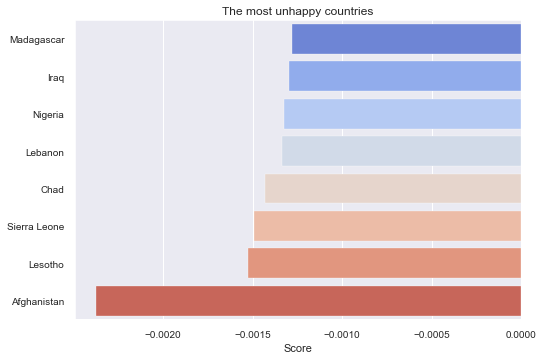

In [66]:
happinessFilter = (df5.loc[:,"Rank"] > 141) ;
y = df5.index.values[-8:]
ax = sns.barplot(x = "Score", y = y, data = df5[happinessFilter], palette = "coolwarm");
ax.set_title('The most unhappy countries')

Text(0.5, 1.0, 'The most happy countries')

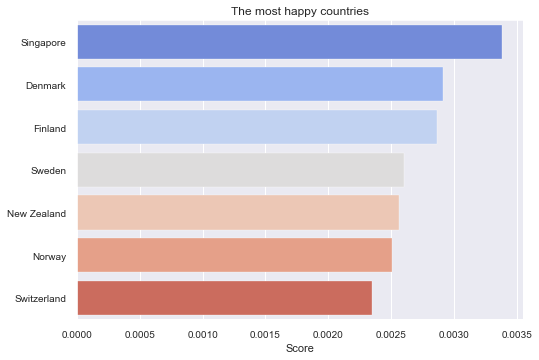

In [67]:
happinessFilter = (df5.loc[:,"Rank"] < 8) ;
y = df5.index.values[0:7]
ax = sns.barplot(x = "Score", y = y, data = df5[happinessFilter], palette = "coolwarm");
ax.set_title('The most happy countries')

In [105]:
fig = px.choropleth(data, locations = "Country name", color = "Ladder score", locationmode='country names',animation_frame = "Ladder score")
fig.update_layout(title_text = 'World Happiness Index - year wise data', title_x = 0.5)
fig.show()
plt.savefig('map.png')

<Figure size 576x396 with 0 Axes>

In [108]:
df = px.data.gapminder().query("year==2007")
fig = px.choropleth(df, locations="iso_alpha",
                    color="lifeExp", # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894


## WSM + WPM:

### Step 0:

In [72]:
#Add max for each column
df6 =df.copy()
Max = df6.max(numeric_only=True)
Max = Max.rename('Max')
#Add min for each column
Min = df6.min(numeric_only=True)
Min = Min.rename('Min')
#Add weigths
criteria = len(df6.columns)
Weight = 1/criteria
Weigths = []
for i in range(len(df6.columns)):
     Weigths.append(Weight)
W = pd.Series(Weigths, index = df6.columns)
W = W.rename("Weights")
df6 = df6.append([Max,Min,W], ignore_index=False)
df6

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Finland,10.775,0.954,72.000,0.949,0.186
Denmark,10.933,0.954,72.700,0.946,0.179
Switzerland,11.117,0.942,74.400,0.919,0.292
Iceland,10.878,0.983,73.000,0.955,0.673
Netherlands,10.932,0.942,72.400,0.913,0.338
...,...,...,...,...,...
Zimbabwe,7.943,0.750,56.201,0.677,0.821
Afghanistan,7.695,0.463,52.493,0.382,0.924
Max,11.647,0.983,76.953,0.970,0.939
Min,6.635,0.463,48.478,0.382,0.082


### WSM or Simple Additive Weighting(SAW) method

### Step 1: Normalize the decision matrix

In [73]:
#If the criterion is minimized then the value in the Min row should be considered otherwise it's the opposite
#Normalization: [MAX] p_ij = x_ij/max{j}(x_ij) # [MIN] min{j}{x_ij}/x_ij
df7 =pd.DataFrame()
df7["Logged GDP per capita"] = df6["Logged GDP per capita"] / df6.loc["Min"]["Logged GDP per capita"]
df7["Social support"] = df6["Social support"] / df6.loc["Min"]["Social support"]
df7["Healthy life expectancy"] = df6["Healthy life expectancy"] / df6.loc["Min"]["Healthy life expectancy"]
df7["Freedom to make life choices"] = df6["Freedom to make life choices"] / df6.loc["Min"]["Freedom to make life choices"]
df7["Perceptions of corruption"] = df6["Perceptions of corruption"] / df6.loc["Max"]["Perceptions of corruption"]
df7 = df7.drop(["Max","Min","Weights"], axis =0)
df7

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Finland,1.623964,2.060475,1.485210,2.484293,0.198083
Denmark,1.647777,2.060475,1.499649,2.476440,0.190628
Switzerland,1.675509,2.034557,1.534717,2.405759,0.310969
Iceland,1.639488,2.123110,1.505838,2.500000,0.716720
Netherlands,1.647626,2.034557,1.493461,2.390052,0.359957
...,...,...,...,...,...
Lesotho,1.194574,1.699784,1.004579,1.871728,0.974441
Botswana,1.474303,1.693305,1.222596,2.157068,0.853035
Rwanda,1.156895,1.192225,1.266554,2.348168,0.177849
Zimbabwe,1.197136,1.619870,1.159309,1.772251,0.874334


### Step 2: WSM

In [74]:
df8 = df6.loc["Weights"] ** df7
df8 = df8.sum(axis= 1)
df8 =df8.rename("Sum")
df8 = pd.DataFrame(df8)
df8['Rank'] = df8.rank(axis= 0,ascending= False)
df8 = df8.sort_values(by=['Rank'])
df8

,Sum,Rank
Rwanda,1.206307,1.0
Singapore,1.069908,2.0
Burundi,0.976791,3.0
Denmark,0.950668,4.0
Finland,0.946519,5.0
...,...,...
Romania,0.473638,145.0
Slovakia,0.469495,146.0
Czech Republic,0.462545,147.0
Croatia,0.461208,148.0


### The Hapiest and Most Unhappy Countries according to WSM

In [81]:
print("The Happiest Country: ", df8.index.values[0]);
print("The Most Unhappy Country: ", df8.index.values[-1]);

The Happiest Country:  Rwanda
The Most Unhappy Country:  Portugal


Text(0.5, 1.0, 'The most unhappy countries')

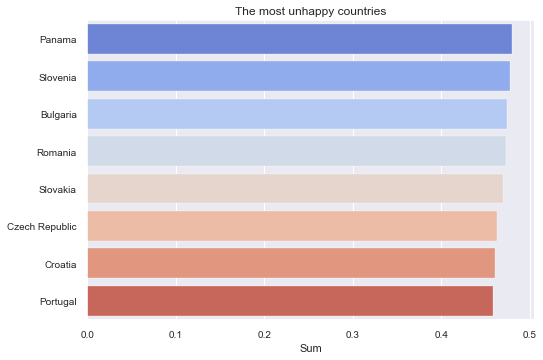

In [83]:
happinessFilter = (df8.loc[:,"Rank"] > 141) ;
y = df8.index.values[-8:]
ax = sns.barplot(x = "Sum", y = y, data = df8[happinessFilter], palette = "coolwarm");
ax.set_title('The most unhappy countries')

Text(0.5, 1.0, 'The most happy countries')

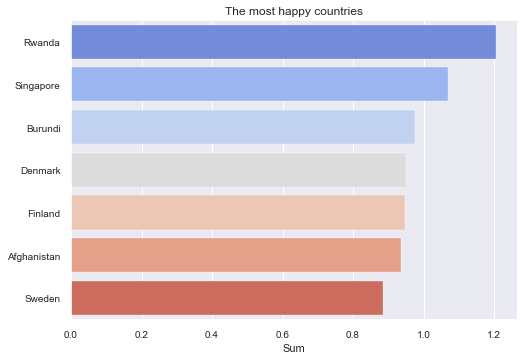

In [84]:
happinessFilter = (df8.loc[:,"Rank"] < 8) ;
y = df8.index.values[0:7]
ax = sns.barplot(x = "Sum", y = y, data = df8[happinessFilter], palette = "coolwarm");
ax.set_title('The most happy countries')

### Step 3: WPM

In [75]:
df9 = df6.loc["Weights"] * df7
df9 = df9.product(axis= 1)
df9 =df9.rename("Product")
df9 = pd.DataFrame(df9)
df9['Rank'] = df9.rank(axis= 0,ascending= False)
df9 = df9.sort_values(by=['Rank'])
df9

,Product,Rank
Slovenia,0.003265,1.0
Czech Republic,0.003158,2.0
Portugal,0.003152,3.0
Iceland,0.003005,4.0
Panama,0.002888,5.0
...,...,...
Haiti,0.000576,145.0
Afghanistan,0.000395,146.0
Burundi,0.000395,147.0
Singapore,0.000368,148.0


### The Hapiest and Most Unhappy Countries according to WPM

In [76]:
print("The Happiest Country: ", df9.index.values[0]);
print("The Most Unhappy Country: ", df9.index.values[-1]);

The Happiest Country:  Slovenia
The Most Unhappy Country:  Rwanda


Text(0.5, 1.0, 'The most unhappy countries')

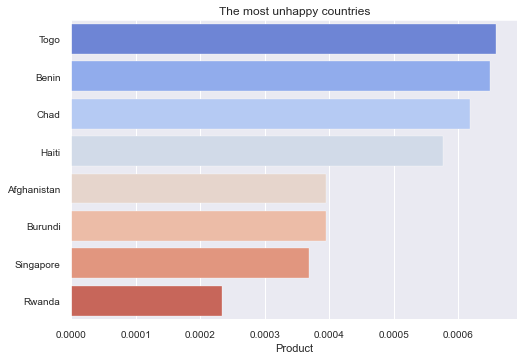

In [79]:
happinessFilter = (df9.loc[:,"Rank"] > 141) ;
y = df9.index.values[-8:]
ax = sns.barplot(x = "Product", y = y, data = df9[happinessFilter], palette = "coolwarm");
ax.set_title('The most unhappy countries')

Text(0.5, 1.0, 'The most happy countries')

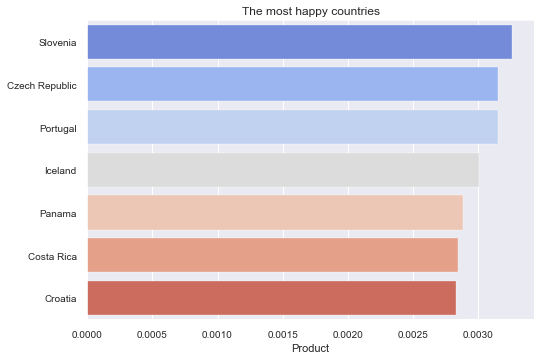

In [80]:
happinessFilter = (df9.loc[:,"Rank"] < 8) ;
y = df9.index.values[0:7]
ax = sns.barplot(x = "Product", y = y, data = df9[happinessFilter], palette = "coolwarm");
ax.set_title('The most happy countries')

### WASPASS:
     We redo the same steps as the previous methods for the 3 first steps

#### Step 4: combine the two methods

In [85]:
Lambda = 0.5
df10 = pd.DataFrame()
df10["WSM"] = df8["Sum"]
df10["WPM"] = df9["Product"]
df10["Score"] = df10["WSM"] + (1-Lambda) * df10["WPM"]
df10['Rank'] = df10["Score"].rank(axis= 0,ascending= False)
df10 = df10.sort_values(by=['Rank'])
df10

,WSM,WPM,Score,Rank
Rwanda,1.206307,0.000233,1.206424,1.0
Singapore,1.069908,0.000368,1.070092,2.0
Burundi,0.976791,0.000395,0.976989,3.0
Denmark,0.950668,0.000769,0.951053,4.0
Finland,0.946519,0.000783,0.946910,5.0
...,...,...,...,...
Romania,0.473638,0.002736,0.475007,145.0
Slovakia,0.469495,0.002808,0.470899,146.0
Czech Republic,0.462545,0.003158,0.464124,147.0
Croatia,0.461208,0.002835,0.462625,148.0


### The Hapiest and Most Unhappy Countries according to WASPASS

In [86]:
print("The Happiest Country: ", df10.index.values[0]);
print("The Most Unhappy Country: ", df10.index.values[-1]);

The Happiest Country:  Rwanda
The Most Unhappy Country:  Portugal


Text(0.5, 1.0, 'The most unhappy countries')

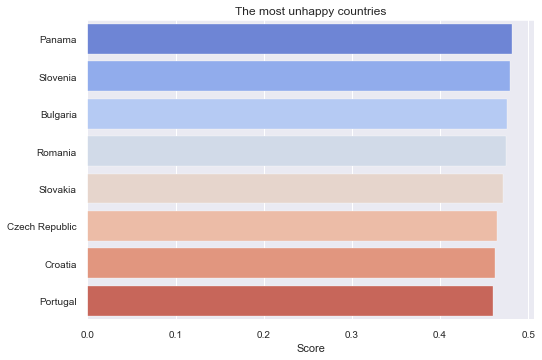

In [89]:
happinessFilter = (df10.loc[:,"Rank"] > 141) ;
y = df10.index.values[-8:]
ax = sns.barplot(x = "Score", y = y, data = df10[happinessFilter], palette = "coolwarm");
ax.set_title('The most unhappy countries')

Text(0.5, 1.0, 'The most happy countries')

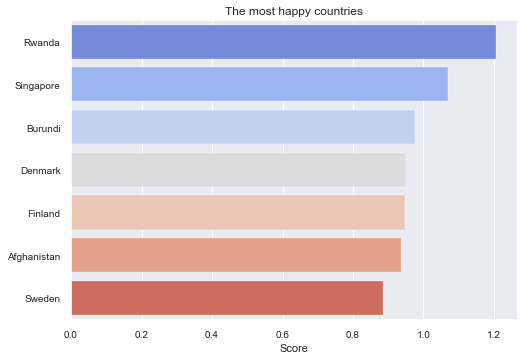

In [90]:
happinessFilter = (df10.loc[:,"Rank"] < 8) ;
y = df10.index.values[0:7]
ax = sns.barplot(x = "Score", y = y, data = df10[happinessFilter], palette = "coolwarm");
ax.set_title('The most happy countries')

### Topsis

In [91]:
df11= df.copy() 
# nb criteria
n = df11.shape[1]
#nb alternatives
m = df11.shape[0]
#Add weigths
criteria = len(df11.columns)
Weight = 1/criteria
Weigths = []
for i in range(len(df11.columns)):
     Weigths.append(Weight)
W = pd.Series(Weigths, index = df11.columns)
W = W.rename("Weights")
Sum = df.sum(axis = 0)
Sum = Sum.rename("Sum")
SQT = np.sqrt((np.power(df, 2)).sum(axis=0))
SQT = SQT.rename("SQRT(Sum(x_ij^2))")
df11 = df11.append([W,Sum,SQT], ignore_index=False)
df11

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Finland,10.77500,0.954000,72.000000,0.949000,0.186000
Denmark,10.93300,0.954000,72.700000,0.946000,0.179000
Switzerland,11.11700,0.942000,74.400000,0.919000,0.292000
Iceland,10.87800,0.983000,73.000000,0.955000,0.673000
Netherlands,10.93200,0.942000,72.400000,0.913000,0.338000
...,...,...,...,...,...
Zimbabwe,7.94300,0.750000,56.201000,0.677000,0.821000
Afghanistan,7.69500,0.463000,52.493000,0.382000,0.924000
Weights,0.20000,0.200000,0.200000,0.200000,0.200000
Sum,1405.39900,121.397000,9683.927000,117.948000,108.390000


### Step 1 : Normalization

In [92]:
#Normalization: r_ij
df12 = df11 / df11.loc["SQRT(Sum(x_ij^2))"]
df12 = df12.drop(["Weights","Sum","SQRT(Sum(x_ij^2))"],axis=0)
df12

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Finland,0.092892,0.094992,0.090272,0.097228,0.020342
Denmark,0.094255,0.094992,0.091149,0.096921,0.019577
Switzerland,0.095841,0.093797,0.093281,0.094155,0.031935
Iceland,0.093780,0.097879,0.091526,0.097843,0.073605
Netherlands,0.094246,0.093797,0.090773,0.093540,0.036966
...,...,...,...,...,...
Lesotho,0.068331,0.078363,0.061059,0.073254,0.100072
Botswana,0.084332,0.078065,0.074310,0.084422,0.087604
Rwanda,0.066176,0.054964,0.076982,0.091901,0.018264
Zimbabwe,0.068477,0.074679,0.070463,0.069361,0.089791


### Step 2 : Weighted normalized decision matrix

In [93]:
#2- v_ij = r_ij*w_ij
df13 = df12 * df11.loc["Weights"]
df13 

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Finland,0.018578,0.018998,0.018054,0.019446,0.004068
Denmark,0.018851,0.018998,0.018230,0.019384,0.003915
Switzerland,0.019168,0.018759,0.018656,0.018831,0.006387
Iceland,0.018756,0.019576,0.018305,0.019569,0.014721
Netherlands,0.018849,0.018759,0.018155,0.018708,0.007393
...,...,...,...,...,...
Lesotho,0.013666,0.015673,0.012212,0.014651,0.020014
Botswana,0.016866,0.015613,0.014862,0.016884,0.017521
Rwanda,0.013235,0.010993,0.015396,0.018380,0.003653
Zimbabwe,0.013695,0.014936,0.014093,0.013872,0.017958


### Step 3: Calculate the ideal best

In [94]:
#3- V_j+ and V_j-
df14 = pd.DataFrame()
Max = df13.max()
Max = Max.rename('Max')
#Add min for each column
Min = df13.min()
Min = Min.rename('Min')
df14 = df14.append([Max,Min], ignore_index=False)
#Chose the v_j+ row
v_jPlus = df14.loc["Max"][0:4]
v_jPlus= v_jPlus.append(df14.loc["Min"][4:5])
v_jPlus = v_jPlus.rename("v_j+")
#Chose the v_j- row
v_jMoins = df14.loc["Min"][0:4]
v_jMoins= v_jMoins.append(df14.loc["Max"][4:5])
v_jMoins = v_jMoins.rename("v_j-")
df14 = df14.append([v_jPlus,v_jMoins], ignore_index=False)
df14

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Max,0.020082,0.019576,0.019296,0.019876,0.020539
Min,0.011440,0.009220,0.012156,0.007827,0.001794
v_j+,0.020082,0.019576,0.019296,0.019876,0.001794
v_j-,0.011440,0.009220,0.012156,0.007827,0.020539


### Step 4: Euclidean distance from ideal best and worst

In [95]:
#4.1- SQR(v_ij - v_j+)
df15 = np.power((df13 - df14.loc["v_j+"]),2)
df15["Sum"] = df15.sum(axis=1)
df15["S_i+"] = np.sqrt(df15["Sum"])
df15

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Sum,S_i+
Finland,2.260578e-06,3.335279e-07,1.542536e-06,1.851614e-07,0.000005,0.000009,0.003082
Denmark,1.515594e-06,3.335279e-07,1.137337e-06,2.418434e-07,0.000005,0.000008,0.002780
Switzerland,8.350995e-07,6.666593e-07,4.098266e-07,1.092074e-06,0.000021,0.000024,0.004910
Iceland,1.758082e-06,0.000000e+00,9.825443e-07,9.447009e-08,0.000167,0.000170,0.013037
Netherlands,1.519842e-06,6.666593e-07,1.303448e-06,1.364148e-06,0.000031,0.000036,0.006017
...,...,...,...,...,...,...,...
Lesotho,4.116289e-05,1.523521e-05,5.019121e-05,2.730186e-05,0.000332,0.000466,0.021584
Botswana,1.034056e-05,1.570516e-05,1.966344e-05,8.949887e-06,0.000247,0.000302,0.017378
Rwanda,4.687985e-05,7.367001e-05,1.520992e-05,2.237472e-06,0.000003,0.000141,0.011893
Zimbabwe,4.078763e-05,2.153020e-05,2.707812e-05,3.604517e-05,0.000261,0.000387,0.019666


In [96]:
#4.2- SQR(v_ij - v_j+)
df16 = np.power((df13 - df14.loc["v_j-"]),2)
df16["Sum"] = df16.sum(axis=1)
df16["S_i-"] = np.sqrt(df16["Sum"])
df16

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Sum,S_i-
Finland,0.000051,0.000096,3.478941e-05,0.000135,2.712886e-04,0.000588,0.024241
Denmark,0.000055,0.000096,3.689084e-05,0.000134,2.763559e-04,0.000597,0.024440
Switzerland,0.000060,0.000091,4.225086e-05,0.000121,2.002858e-04,0.000514,0.022679
Iceland,0.000054,0.000107,3.781031e-05,0.000138,3.385360e-05,0.000370,0.019243
Netherlands,0.000055,0.000091,3.598268e-05,0.000118,1.728186e-04,0.000473,0.021750
...,...,...,...,...,...,...,...
Lesotho,0.000005,0.000042,3.098878e-09,0.000047,2.755904e-07,0.000093,0.009666
Botswana,0.000029,0.000041,7.321868e-06,0.000082,9.111707e-06,0.000169,0.012991
Rwanda,0.000003,0.000003,1.049924e-05,0.000111,2.851518e-04,0.000413,0.020332
Zimbabwe,0.000005,0.000033,3.750339e-06,0.000037,6.662015e-06,0.000085,0.009203


### Step 4: Calculate the performance score

In [97]:
df17 = pd.DataFrame()
df17["S_i+"] = df15["S_i+"]
df17["S_i-"] = df16["S_i-"]
df17["Sum"] = df17.sum(axis=1)
df17["Pi"] = df17["S_i-"] / df17["Sum"]
df17['Rank'] = df17["Pi"].rank(axis= 0,ascending= False)
df17 = df17.sort_values(by=['Rank'])
df17

,S_i+,S_i-,Sum,Pi,Rank
Singapore,0.001639,0.026041,0.027680,0.940798,1.0
Denmark,0.002780,0.024440,0.027221,0.897861,2.0
Finland,0.003082,0.024241,0.027323,0.887211,3.0
Sweden,0.003957,0.023388,0.027344,0.855301,4.0
New Zealand,0.004151,0.023198,0.027349,0.848224,5.0
...,...,...,...,...,...
Madagascar,0.020745,0.007057,0.027802,0.253821,145.0
Comoros,0.020546,0.006693,0.027238,0.245709,146.0
Togo,0.020800,0.006750,0.027549,0.245006,147.0
Chad,0.021766,0.005989,0.027754,0.215770,148.0


### The Hapiest and Most Unhappy Countries according to Topsis

In [98]:
print("The Happiest Country: ", df17.index.values[0]);
print("The Most Unhappy Country: ", df17.index.values[-1]);

The Happiest Country:  Singapore
The Most Unhappy Country:  Afghanistan


Text(0.5, 1.0, 'The most unhappy countries')

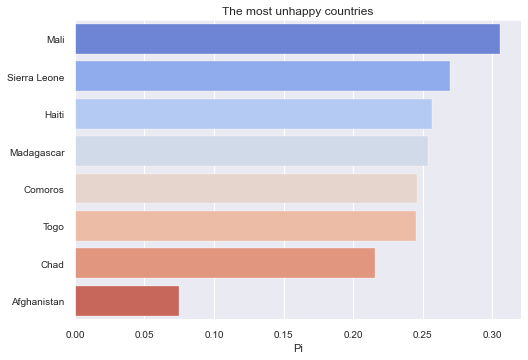

In [100]:
happinessFilter = (df17.loc[:,"Rank"] > 141) ;
y = df17.index.values[-8:]
ax = sns.barplot(x = "Pi", y = y, data = df17[happinessFilter], palette = "coolwarm");
ax.set_title('The most unhappy countries')

Text(0.5, 1.0, 'The most happy countries')

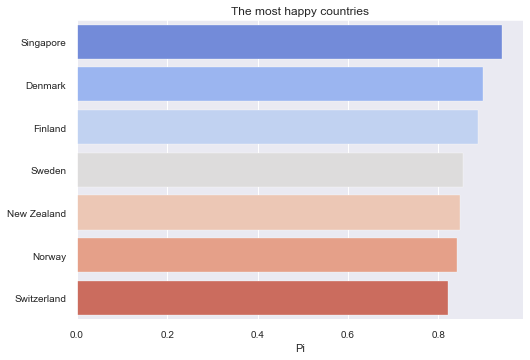

In [101]:
happinessFilter = (df17.loc[:,"Rank"] < 8) ;
y = df17.index.values[0:7]
ax = sns.barplot(x = "Pi", y = y, data = df17[happinessFilter], palette = "coolwarm");
ax.set_title('The most happy countries')